<h1 style="text-align: center;"><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

In [2]:
!gdown --id 1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB
To: /content/cat_dog_data.zip
100% 595M/595M [00:02<00:00, 213MB/s]


In [3]:
import zipfile
with zipfile.ZipFile("cat_dog_data.zip", 'r') as zip:
 # printing all the contents of the zip file 
   zip.printdir()
 # extracting all the files 
   print('Extracting all the files now...') 
   zip.extractall() 
   print('Done!')

Görüntülenen çıkış son 5000 satıra kısaltıldı.
data/train/cat/cat.5734.jpg                    2021-10-25 12:07:30        27962
data/train/cat/cat.5789.jpg                    2021-10-25 12:08:08        34375
data/train/cat/cat.11181.jpg                   2021-10-25 11:20:56        30736
data/train/cat/cat.9089.jpg                    2021-10-25 12:35:34        25111
data/train/cat/cat.3316.jpg                    2021-10-25 11:47:40        20418
data/train/cat/cat.5193.jpg                    2021-10-25 12:02:42         9324
data/train/cat/cat.7184.jpg                    2021-10-25 12:19:12         5220
data/train/cat/cat.5659.jpg                    2021-10-25 12:06:42        26791
data/train/cat/cat.8066.jpg                    2021-10-25 12:26:14        17122
data/train/cat/cat.6040.jpg                    2021-10-25 12:10:18        17624
data/train/cat/cat.7276.jpg                    2021-10-25 12:19:56        16134
data/train/cat/cat.4078.jpg                    2021-10-25 11:53:34       

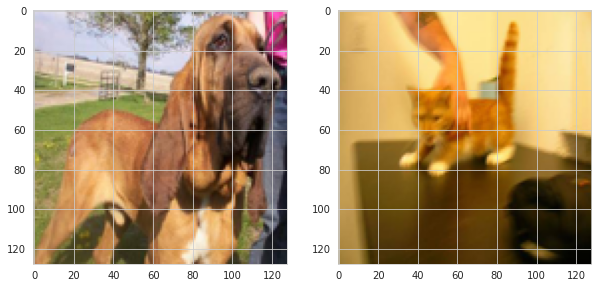

In [4]:
from PIL import Image

plt.subplot(1,2,1)
image = Image.open('data/train/dog/2462.jpg').resize((128,128))
plt.imshow(image)
plt.subplot(1,2,2)
image = Image.open('data/train/cat/cat.0.jpg').resize((128,128))
plt.imshow(image)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 20 degrees
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.15, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.2, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_accuracy',patience=5)



In [15]:
val_path = 'data/validation'
train_path = 'data/train'
test_path = 'data/test'

In [16]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(64,64), # image_shape = (128,128,3)
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='binary', shuffle=True, seed=42)
val_image_gen = image_gen.flow_from_directory(val_path,
                                              target_size=(64,64),
                                              color_mode='rgb',
                                              batch_size=32,
                                              class_mode='binary', shuffle=True, seed=42)

Found 17526 images belonging to 2 classes.
Found 2290 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [17]:
results = model.fit(train_image_gen,epochs=30, validation_data=val_image_gen, callbacks=[early_stop])

Epoch 1/30
548/548 [==============================] - 70s 127ms/step - loss: 0.5673 - accuracy: 0.7244 - val_loss: 0.6143 - val_accuracy: 0.6467
Epoch 2/30
548/548 [==============================] - 70s 127ms/step - loss: 0.4998 - accuracy: 0.7602 - val_loss: 0.6001 - val_accuracy: 0.6769
Epoch 3/30
548/548 [==============================] - 68s 125ms/step - loss: 0.4687 - accuracy: 0.7856 - val_loss: 0.5427 - val_accuracy: 0.7345
Epoch 4/30
548/548 [==============================] - 69s 126ms/step - loss: 0.4434 - accuracy: 0.7955 - val_loss: 0.5708 - val_accuracy: 0.6996
Epoch 5/30
548/548 [==============================] - 70s 128ms/step - loss: 0.4249 - accuracy: 0.8071 - val_loss: 0.4627 - val_accuracy: 0.7895
Epoch 6/30
548/548 [==============================] - 69s 126ms/step - loss: 0.4029 - accuracy: 0.8212 - val_loss: 0.4554 - val_accuracy: 0.7934
Epoch 7/30
548/548 [==============================] - 70s 128ms/step - loss: 0.3867 - accuracy: 0.8259 - val_loss: 0.4886 - val_ac

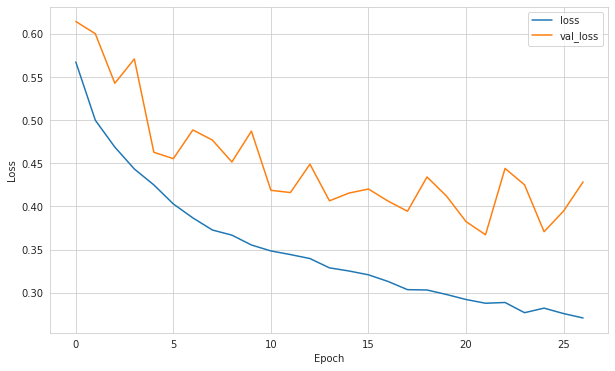

In [18]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,6))
plt.plot(losses.loss, label="loss")
plt.plot(losses.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

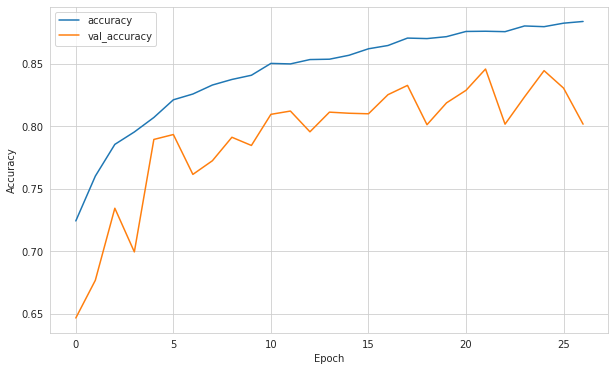

In [19]:
plt.figure(figsize=(10,6))
plt.plot(losses.accuracy, label="accuracy")
plt.plot(losses.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [20]:
score = model.evaluate(val_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

72/72 [==============================] - 8s 108ms/step - loss: 0.4203 - accuracy: 0.8127
Test loss: 0.4202582836151123
Test accuracy: 0.812663733959198


In [22]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                              target_size=(64,64),
                                              color_mode='rgb',
                                              batch_size=32,
                                              class_mode='binary', shuffle=False, seed=42)

pred_probabilities = model.predict(val_image_gen)
predictions = pred_probabilities > 0.5
print(predictions)
print(val_image_gen.classes)

Found 2290 images belonging to 2 classes.
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]
[0 0 0 ... 1 1 1]


In [23]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(val_image_gen.classes,predictions))
print("-----"*20)
print(classification_report(val_image_gen.classes,predictions))

[[1170   49]
 [ 390  681]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.96      0.84      1219
           1       0.93      0.64      0.76      1071

    accuracy                           0.81      2290
   macro avg       0.84      0.80      0.80      2290
weighted avg       0.84      0.81      0.80      2290



In [29]:
from tensorflow.keras.models import load_model
model.save('cat_dog_cnn2.h5')

# Image Prediction

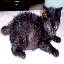

In [30]:
from PIL import Image
from tensorflow.keras.preprocessing import image

model=load_model('cat_dog_cnn2.h5')
img = image.load_img(test_path+"/10001.jpg", target_size=(64,64,3)) 
img   

In [31]:
img_array = np.array(img) 
img_array = np.expand_dims(img_array, axis=0)
img_array.shape

(1, 64, 64, 3)

In [32]:
model.predict(img_array)

array([[0.]], dtype=float32)

In [33]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}